In [1]:
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append("../")
from utils.Sen2_RDSR import (
    Sen2RDSR
)
from utils.loaddata import (
    Sentinel2Dataset20IMG
)


torch.Size([1, 6, 60, 60]) torch.Size([1, 2, 60, 60])


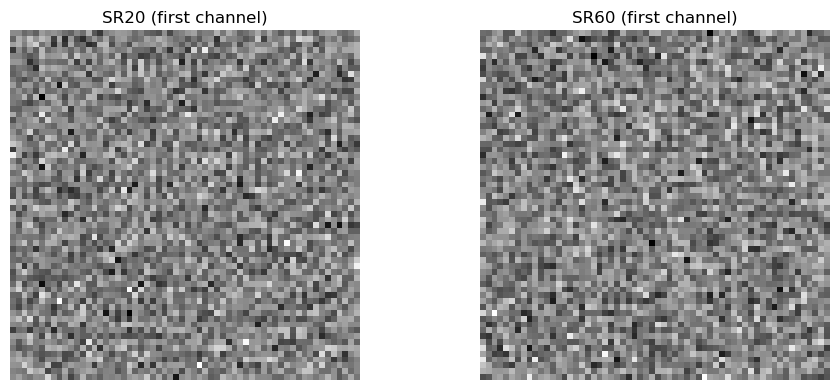

In [2]:
model = Sen2RDSR()
#print(model)
# Dummy input tensors
im10 = torch.randn(1, 4, 60, 60)       # HR bands at 10m
im20 = torch.randn(1, 6, 60, 60)        # 20m bands
im60 = torch.randn(1, 2, 60, 60)        # 60m bands

sr20, sr60 = model(im10, im20, im60)
print(sr20.shape, sr60.shape)  # Expect [1, 6, 60, 60] and [1, 2, 60, 60]

# Plot the first channel of sr20 and sr60 as images
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("SR20 (first channel)")
plt.imshow(sr20[0, 0].detach().cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("SR60 (first channel)")
plt.imshow(sr60[0, 0].detach().cpu().numpy(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### DATALOADER

In [3]:
dataset = Sentinel2Dataset20IMG()

# Plot one image from each dataset tuple to check data loading
im10, im20, target20 = dataset[0]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("im10 (first band)")
plt.imshow(im10[0].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("im20 (first band)")
plt.imshow(im20[0].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("target20 (first band)")
plt.imshow(target20[0].cpu().numpy(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


[]


ValueError: need at least one array to concatenate